In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv


path=%pwd

# import zipfile as zf
# files = zf.ZipFile("BLS.zip", 'r')
# files.extractall(path)
# files.close()

In [8]:

#INPUT SERIES FOLDER AND YEARS:

#Add 'fw' years values after series description gets added
years={'cx': list(range(2005, 2019)), 'cu': list(range(2005, 2021)), 'fm': list(range(2005, 2020)), 'le': list(range(2005, 2021)), 'ln': list(range(2005, 2021))}


#Find series id's based on keywords
def find_keywords(L):
    surveys=dict()
    #Load description dataframes
    for survey in years:
        desc=pd.read_csv('series-descriptions-'+survey+'.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False)
        newdf=desc.copy()
        for word in L:
            newdf=newdf[newdf['SERIES_TITLE'].str.contains(word)]
        surveys[survey]=newdf
    df=pd.concat(list(surveys.values()), ignore_index=True)
    return df



#Join years after choosing a series id

def IdSubframe(s_id):
    s_type=s_id[0:2].lower()
    Y=years[s_type]
    frames=dict()
    for year in Y:
        newframe=pd.read_csv(s_type+'-'+str(year)+'.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False, dtype={'characteristics_code':'str', 'area_code':'str'})
        frames[year]=newframe[newframe['series_id']==s_id]
    df=pd.concat(list(frames.values()), ignore_index=True)
    return df




In [9]:
#Functions to make the joined frame readable (decode the codes)




def find_legend_file(s_type, word):
    legend=[f for f in os.listdir(path) if  'LEGEND' in f and 'tsv.gz' in f and s_type in f]
    for item in legend:
        if word in item:
            return pd.read_csv(item, compression='gzip', header=0, sep='\t', quotechar='"', error_bad_lines=False)
        
        
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3


def subfr(d1, d2, intersect, idx):
    for x in intersect:
        text_version=x.split('_')[0]+'_text'
        if text_version in list(d2.columns):
            get_text=text_version
    if len(intersect)==1:
        print(d2[d2[intersect[0]]==d1[intersect[0]][idx]][get_text].iloc[0])
        return d2[d2[intersect[0]]==d1[intersect[0]][idx]][get_text].iloc[0]
    else:
        print(d2[(d2[intersect[1]]==d1[intersect[1]][idx]) & (d2[intersect[0]]==d1[intersect[0]][idx])][get_text])
        return d2[(d2[intersect[1]]==d1[intersect[1]][idx]) & (d2[intersect[0]]==d1[intersect[0]][idx])][get_text].values[0]
 

def MakeReadable(olddf):
    s_type=olddf['series_id'].iloc[0][0:2].lower()
    df=olddf.copy()
    df.rename(columns={'footnote_codes':'footnote_code'}, inplace=True)
    title=df['series_title'].iloc[0]
    s_id=df['series_id'].iloc[0]
    #remove superflous columns
    df.drop(['series_id', 'series_id.1', 'footnote_codes.1', 'series_title'], axis=1, inplace=True)
    #Now replace entries codes by their title
    l1=list(df.columns)
    files_cols=dict()
    for item in l1:
        if 'code' in item and 'codes.1' not in item:
            files_cols[item]=find_legend_file(s_type, item.split('_')[0])        
    for col in files_cols:
        df[col.split('_')[0]+'_text']=df[col].copy()
    for idx in range(len(df)):
        for col in l1:
            if col in files_cols and pd.notnull(df[col][idx]):
                d2=files_cols[col].copy()
                l2=list(d2.columns)
                intersect=intersection(l1, l2)
                #print(intersection(l1, l2))
                for x in intersection(l1, l2):
                    text_version=x.split('_')[0]+'_text'
                    name_version=x.split('_')[0]+'_name'
                    if text_version in l2:
                        get_text=text_version
                    if name_version in l2:
                        get_text=name_version
                if len(intersection(l1, l2)) == 2:
                    df[text_version][idx]= d2[(d2[intersect[1]]==df[intersect[1]][idx]) & (d2[intersect[0]]==df[intersect[0]][idx])][get_text].values[0]
                if len(intersection(l1, l2)) == 1:
                    df[text_version][idx]=d2[d2[intersect[0]]==df[intersect[0]][idx]][get_text].iloc[0]
    for x in df.columns:
        if 'code' in x:
            df.drop([x], axis=1, inplace=True)
    return df, title, s_id



In [19]:
#An example


#Find series containing specific keywords

subf=find_keywords(['Education']) #gives a dataframe with all series containing 'Education' as a keyword

#print(subf)

#Pick one of the series ID

sid = subf['SERIES_ID'].iloc[200]
#print(sid)


# In the following, this is what the joined years would look like for a chosen series_id

#IdSubframe(sid)

In [20]:
df, title, s_id = MakeReadable(IdSubframe(sid))

C:\Users\angel\anaconda3\envs\tsa_course\lib\site-packages\ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\angel\anaconda3\envs\tsa_course\lib\site-packages\ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
df

,year,period,value,seasonal,begin_year,begin_period,end_year,end_period,footnote_text,category_text,subcategory_text,item_text,demographics_text,characteristics_text,process_text
0,2005,A01,94.0,U,1996,A01,2012,A01,NaN,Consumer Characteristics,Percent distribution:,At least one vehicle owned or leased,Education of reference person,Bachelor's degree,Means
1,2006,A01,93.0,U,1996,A01,2012,A01,NaN,Consumer Characteristics,Percent distribution:,At least one vehicle owned or leased,Education of reference person,Bachelor's degree,Means
2,2007,A01,93.0,U,1996,A01,2012,A01,NaN,Consumer Characteristics,Percent distribution:,At least one vehicle owned or leased,Education of reference person,Bachelor's degree,Means
3,2008,A01,94.0,U,1996,A01,2012,A01,NaN,Consumer Characteristics,Percent distribution:,At least one vehicle owned or leased,Education of reference person,Bachelor's degree,Means
4,2009,A01,94.0,U,1996,A01,2012,A01,NaN,Consumer Characteristics,Percent distribution:,At least one vehicle owned or leased,Education of reference person,Bachelor's degree,Means
5,2010,A01,93.0,U,1996,A01,2012,A01,NaN,Consumer Characteristics,Percent distribution:,At least one vehicle owned or leased,Education of reference person,Bachelor's degree,Means
6,2011,A01,93.0,U,1996,A01,2012,A01,NaN,Consumer Characteristics,Percent distribution:,At least one vehicle owned or leased,Education of reference person,Bachelor's degree,Means
7,2012,A01,92.0,U,1996,A01,2012,A01,NaN,Consumer Characteristics,Percent distribution:,At least one vehicle owned or leased,Education of reference person,Bachelor's degree,Means


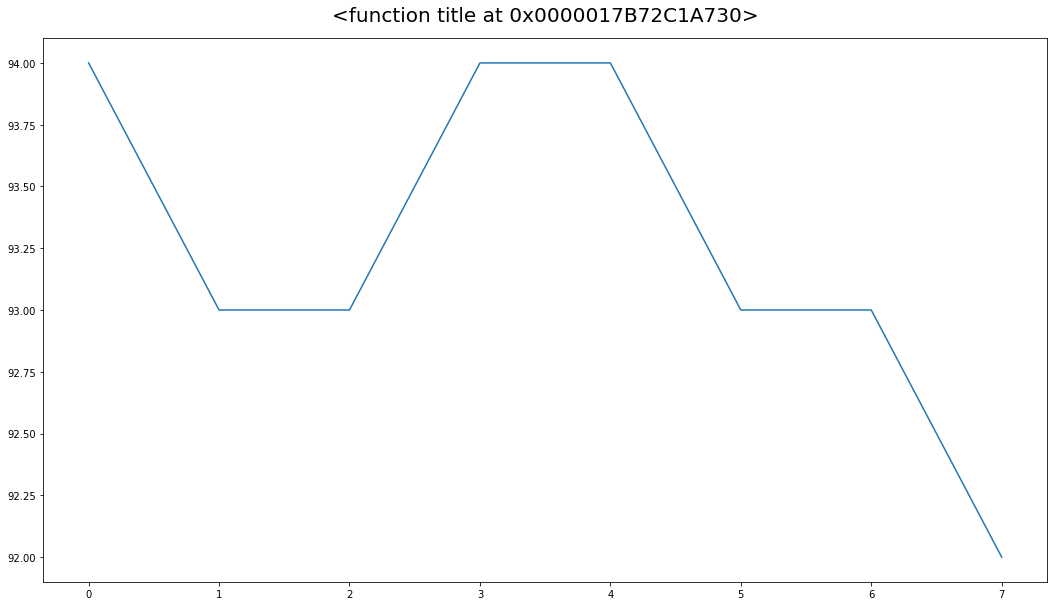

In [22]:
## Some generic plotting

from numpy import *
import math
import matplotlib.pyplot as plt

import pandas as pd
from matplotlib.pyplot import *




fig, ax = subplots()
f1 = plt.figure(1)
df['value'].plot(figsize=(18,10), ax=ax)
    
ax.set_title(title, fontsize=20) # or size, alternatively
ttl = ax.title
ttl.set_position([.5, 1.02])
    
plt.show()